**Analisis Korelasi antara Faktor Meteorologi dengan Jumlah Kasus Influenza Berdasarkan Kelompok Usia**

KELOMPOK ASKING BERTANYA
- Nino Ahmadiy 24083010049
- Muhammad Shaquille Syafiq 24083010071
- M. Rafly Wahyudi 24083010078
- Dani Shofi Nur Izza 24083010124


#IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

#IMPORT DATA

In [ ]:
df = pd.read_excel("/content/DATA_ASLI.xlsx")
df.head()

,Date,Total,Influneza A,Influneza B,Male,Female,BALITA,A0k_A0k,REMAJA,DEWASA,Lansia,Temperature,Minimum Temperature,Maximum Temperature,Relative humidity,Wind speed,Rainfall,Sunshine duration,Vapour pressure
0,2014-03-01,382,100,282,172,210,46,165,35,123,13,9.1,6.8,12.1,81,3.1,0,0,9.3
1,2014-03-02,174,52,122,98,76,21,75,15,53,10,5.6,4.7,7.7,93,4.1,13.5,0,8.5
2,2014-03-03,436,114,322,229,207,55,183,29,146,23,6.3,4.0,10.0,64,4.7,0,3.6,5.9
3,2014-03-04,353,77,276,179,174,63,146,25,92,27,6.9,2.9,11.0,53,2.6,0.5,8.7,5.3
4,2014-03-05,248,54,194,126,122,37,93,18,88,12,6.1,4.3,8.8,91,4.5,45,0,8.5


#DATA UNDERSTANDING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 4079 non-null   datetime64[ns]
 1   Total                4079 non-null   int64         
 2   Influneza A          4079 non-null   int64         
 3   Influneza B          4079 non-null   int64         
 4   Male                 4079 non-null   int64         
 5   Female               4079 non-null   int64         
 6   BALITA               4079 non-null   int64         
 7   A0k_A0k              4079 non-null   int64         
 8   REMAJA               4079 non-null   int64         
 9   DEWASA               4079 non-null   int64         
 10  Lansia               4079 non-null   int64         
 11  Temperature          4079 non-null   float64       
 12  Minimum Temperature  4079 non-null   float64       
 13  Maximum Temperature  4079 non-nul

In [ ]:
df.isna().sum()

,0
Date,0
Total,0
Influneza A,0
Influneza B,0
Male,0
Female,0
BALITA,0
A0k_A0k,0
REMAJA,0
DEWASA,0


In [ ]:
print(df.columns.tolist())

['Date', 'Total ', 'Influneza A', 'Influneza B', 'Male', 'Female', 'BALITA', 'A0k_A0k', 'REMAJA', 'DEWASA', 'Lansia', 'Temperature', 'Minimum Temperature', 'Maximum Temperature', 'Relative humidity', 'Wind speed', 'Rainfall', 'Sunshine duration', 'Vapour pressure ']


#DATA PREPARATION

In [ ]:
df.columns = df.columns.str.replace('\xa0', '').str.strip()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

In [ ]:
df['Relative humidity'] = pd.to_numeric(df['Relative humidity'], errors='coerce')
df['Rainfall'] = pd.to_numeric(df['Rainfall'], errors='coerce')
df['Sunshine duration'] = pd.to_numeric(df['Sunshine duration'], errors='coerce')
df['Vapour pressure'] = pd.to_numeric(df['Vapour pressure'], errors='coerce')
df = df.rename(columns={'A0k_A0k': 'ANAK_ANAK'})
df = df.rename(columns={'Lansia': 'LANSIA'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 4079 non-null   datetime64[ns]
 1   Total                4079 non-null   int64         
 2   Influneza A          4079 non-null   int64         
 3   Influneza B          4079 non-null   int64         
 4   Male                 4079 non-null   int64         
 5   Female               4079 non-null   int64         
 6   BALITA               4079 non-null   int64         
 7   ANAK_ANAK            4079 non-null   int64         
 8   REMAJA               4079 non-null   int64         
 9   DEWASA               4079 non-null   int64         
 10  LANSIA               4079 non-null   int64         
 11  Temperature          4079 non-null   float64       
 12  Minimum Temperature  4079 non-null   float64       
 13  Maximum Temperature  4079 non-nul

In [ ]:
df['Kategori_Rentan'] = df[['BALITA','ANAK_ANAK','REMAJA','DEWASA','LANSIA']].idxmax(axis=1)


In [ ]:
df

,Date,Total,Influneza A,Influneza B,Male,Female,BALITA,ANAK_ANAK,REMAJA,DEWASA,LANSIA,Temperature,Minimum Temperature,Maximum Temperature,Relative humidity,Wind speed,Rainfall,Sunshine duration,Vapour pressure,Kategori_Rentan
0,2014-03-01,382,100,282,172,210,46,165,35,123,13,9.1,6.8,12.1,81.0,3.1,0.0,0.0,9.3,ANAK_ANAK
1,2014-03-02,174,52,122,98,76,21,75,15,53,10,5.6,4.7,7.7,93.0,4.1,13.5,0.0,8.5,ANAK_ANAK
2,2014-03-03,436,114,322,229,207,55,183,29,146,23,6.3,4.0,10.0,64.0,4.7,0.0,3.6,5.9,ANAK_ANAK
3,2014-03-04,353,77,276,179,174,63,146,25,92,27,6.9,2.9,11.0,53.0,2.6,0.5,8.7,5.3,ANAK_ANAK
4,2014-03-05,248,54,194,126,122,37,93,18,88,12,6.1,4.3,8.8,91.0,4.5,45.0,0.0,8.5,ANAK_ANAK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,2025-04-26,12,7,5,7,5,0,2,4,5,1,15.6,12.9,18.5,64.0,3.0,0.0,1.3,11.2,DEWASA
4075,2025-04-27,4,2,2,0,4,0,1,1,2,0,17.7,11.1,22.5,60.0,4.2,0.0,12.6,11.7,DEWASA
4076,2025-04-28,21,12,9,11,10,3,3,11,4,0,17.7,13.2,21.8,72.0,3.9,25.5,0.1,14.2,REMAJA
4077,2025-04-29,5,1,4,3,2,1,0,2,2,0,17.0,12.8,22.2,62.0,3.3,1.5,11.0,11.6,REMAJA


#ANALISIS UNIVARIAT

##NUMERIK

In [ ]:
df.describe()

,Date,Total,Influneza A,Influneza B,Male,Female,BALITA,ANAK_ANAK,REMAJA,DEWASA,LANSIA,Temperature,Minimum Temperature,Maximum Temperature,Relative humidity,Wind speed,Rainfall,Sunshine duration,Vapour pressure
count,4079,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4077.000000,4079.000000,4078.000000,4077.000000,4077.000000
mean,2019-09-30 00:00:00,75.939936,58.357195,17.582741,39.549645,36.390292,8.194656,15.330228,14.338563,31.196372,6.879627,16.970949,13.738000,21.005786,68.098602,3.502599,4.790829,5.901177,15.196566
min,2014-03-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,-2.700000,3.100000,26.000000,1.300000,0.000000,0.000000,1.700000
25%,2016-12-14 12:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,6.400000,14.100000,56.000000,2.700000,0.000000,1.400000,7.300000
50%,2019-09-30 00:00:00,5.000000,3.000000,0.000000,3.000000,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000,17.300000,13.900000,21.200000,70.000000,3.200000,0.000000,6.600000,13.500000
75%,2022-07-15 12:00:00,51.000000,29.000000,4.000000,26.000000,24.000000,6.000000,10.000000,10.000000,19.000000,3.000000,23.100000,20.300000,27.200000,80.000000,4.000000,1.500000,9.500000,22.300000
max,2025-04-30 00:00:00,2107.000000,2104.000000,981.000000,1121.000000,986.000000,234.000000,412.000000,419.000000,1028.000000,253.000000,31.700000,29.200000,37.400000,99.000000,9.100000,192.500000,13.800000,33.900000
std,NaN,177.318849,155.759975,64.540299,92.801221,84.809987,19.374092,36.390376,33.870710,79.164677,20.282784,7.609973,7.902687,7.782742,15.749187,1.191277,14.445512,4.228216,8.719536


In [ ]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(exclude='number').columns

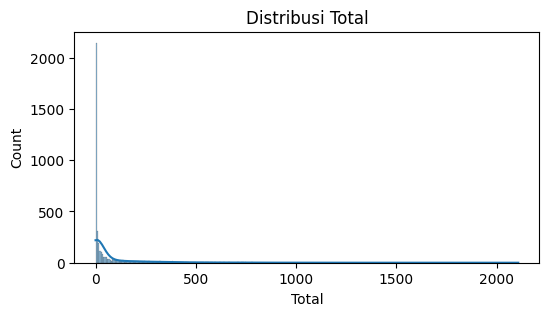

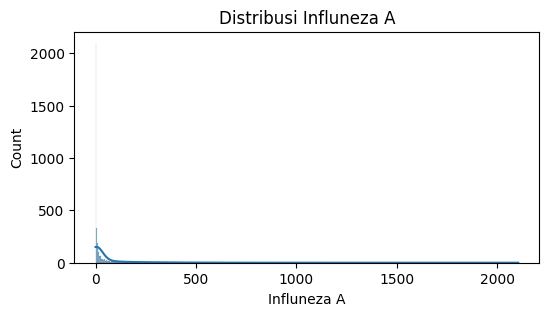

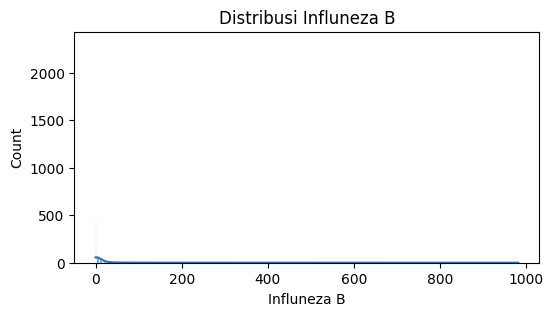

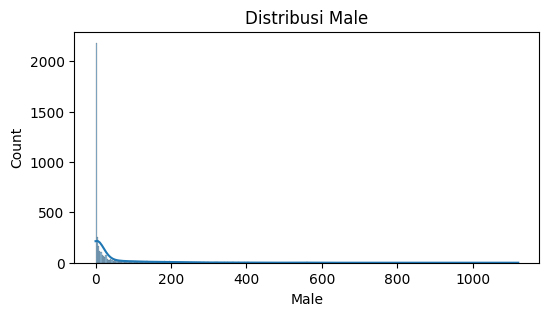

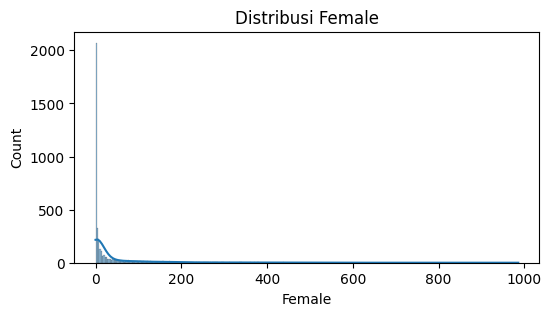

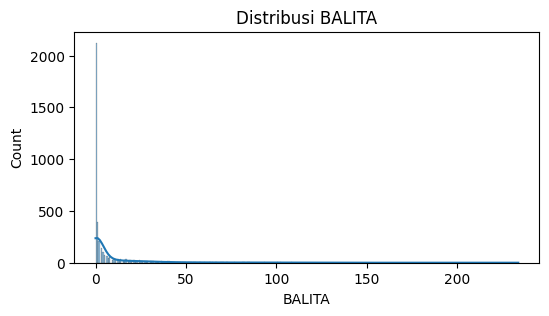

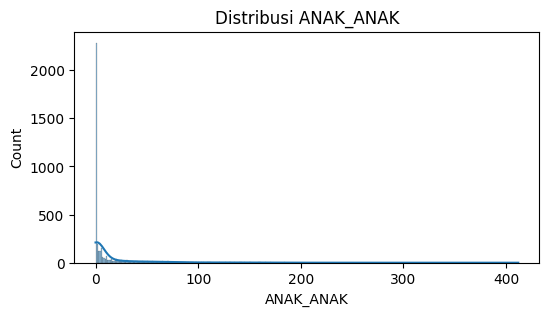

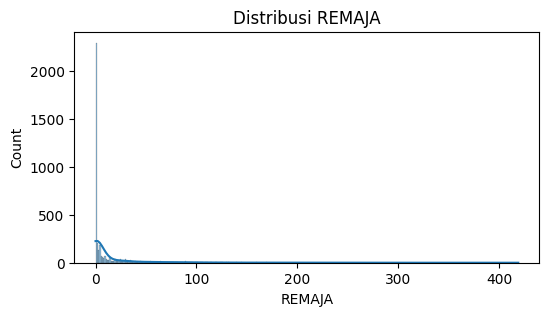

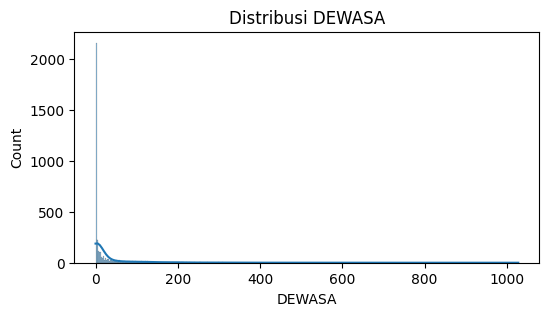

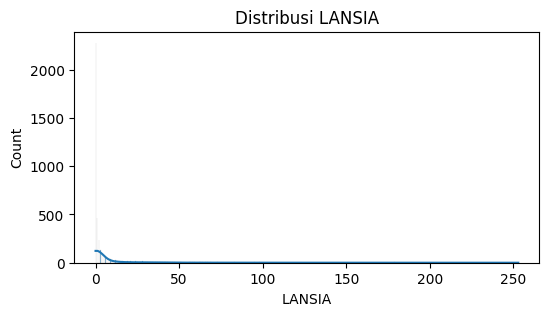

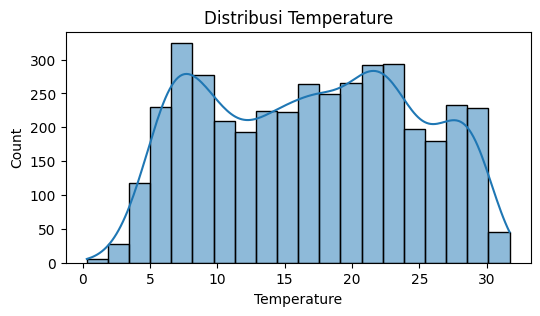

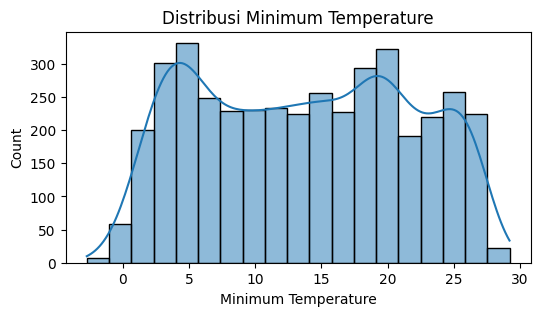

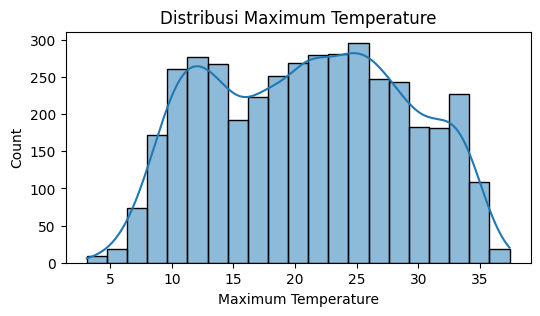

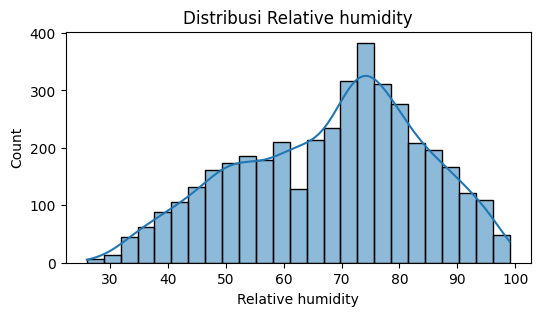

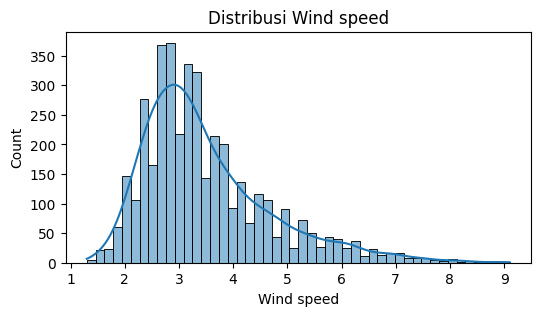

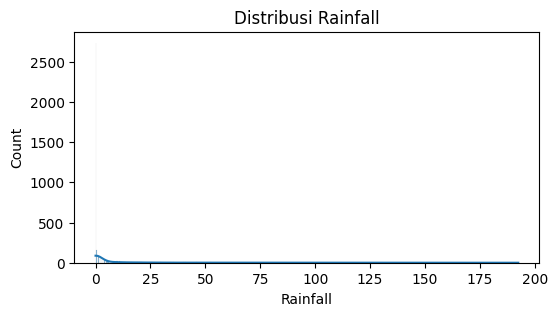

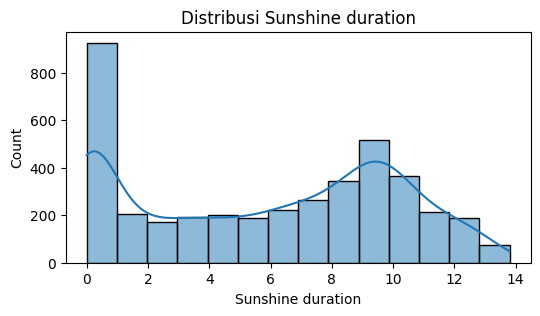

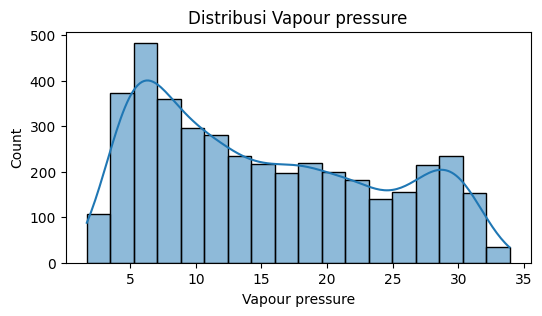

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribusi {col}")
    plt.show()

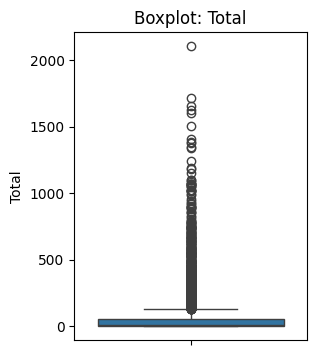

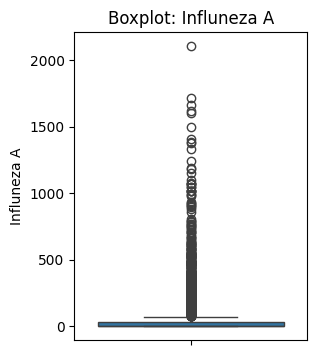

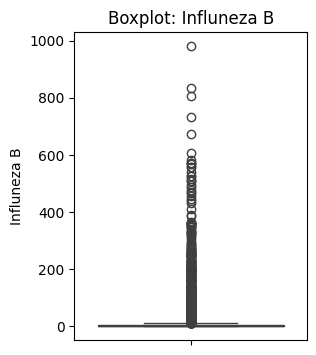

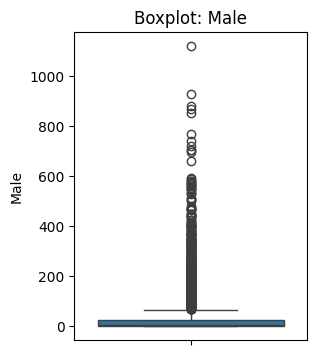

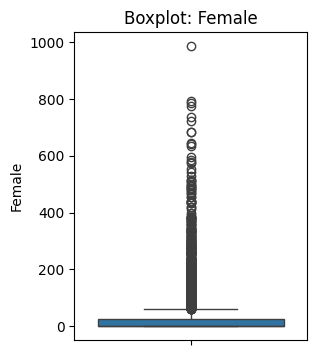

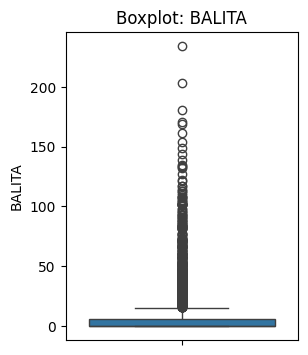

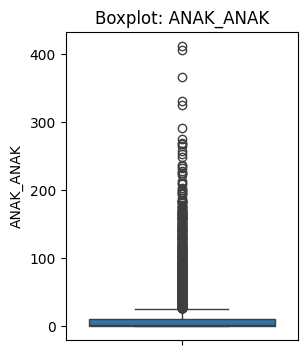

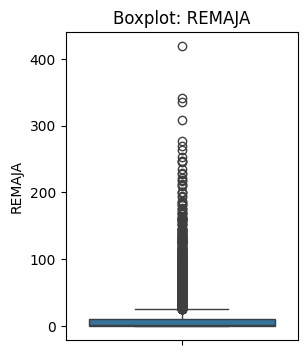

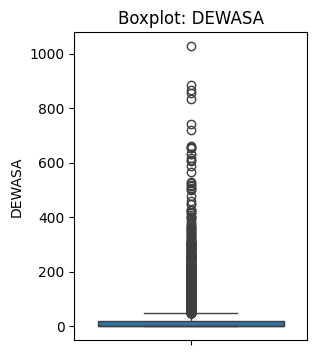

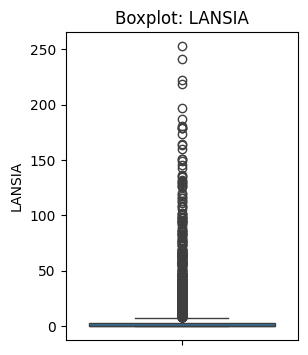

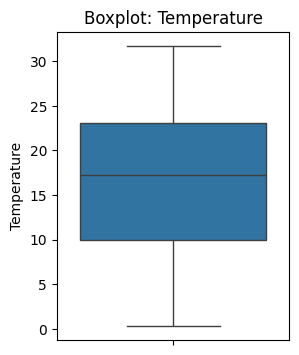

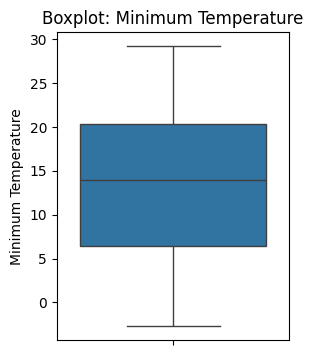

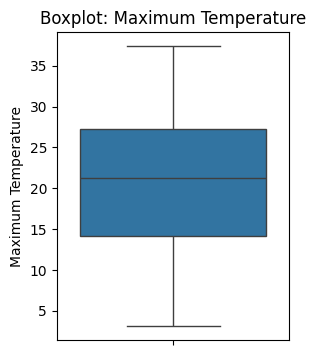

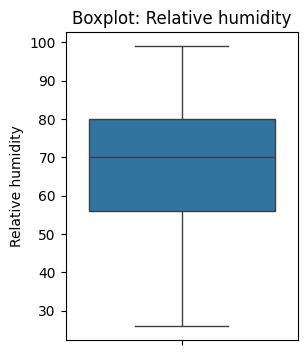

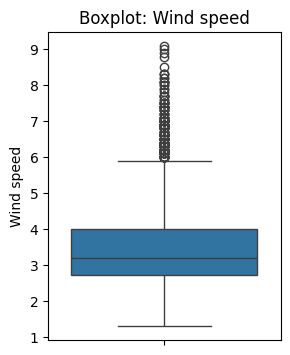

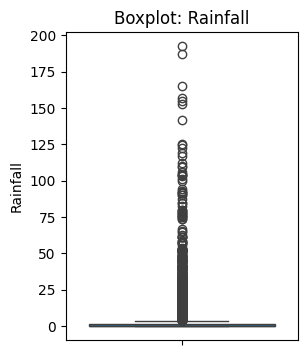

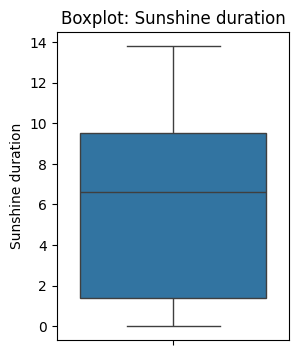

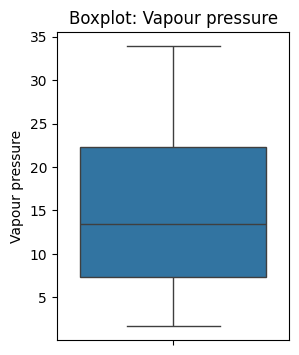

In [ ]:
for col in num_cols:
    plt.figure(figsize=(3,4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()

In [ ]:
for col in num_cols:
    print(f"\n=== {col} ===")
    print("Skewness :", skew(df[col]))
    print("Kurtosis :", kurtosis(df[col]))



=== Total ===
Skewness : 4.075504682784695
Kurtosis : 22.421299603454273

=== Influneza A ===
Skewness : 5.072059640698533
Kurtosis : 35.40966338674545

=== Influneza B ===
Skewness : 6.452054941980404
Kurtosis : 53.917189049295764

=== Male ===
Skewness : 4.116768492069706
Kurtosis : 23.055408988121414

=== Female ===
Skewness : 4.039656583022403
Kurtosis : 21.819224665868674

=== BALITA ===
Skewness : 4.10227499854027
Kurtosis : 22.657171890550064

=== ANAK_ANAK ===
Skewness : 4.094768651193038
Kurtosis : 22.586843757830746

=== REMAJA ===
Skewness : 4.059400577988492
Kurtosis : 22.461174557146947

=== DEWASA ===
Skewness : 4.961252993439492
Kurtosis : 34.49531751602718

=== LANSIA ===
Skewness : 5.403352809437528
Kurtosis : 37.77896760167004

=== Temperature ===
Skewness : 0.0006697578083826535
Kurtosis : -1.1600221934156838

=== Minimum Temperature ===
Skewness : 0.020462731405826152
Kurtosis : -1.2217215973576276

=== Maximum Temperature ===
Skewness : 0.00797953380835269
Kurtosi

##KATEGORIKAL

In [ ]:
for col in cat_cols:
    print(f"\n=== Frekuensi Kategori: {col} ===")
    print(df[col].value_counts())


=== Frekuensi Kategori: Date ===
Date
2025-04-30    1
2014-03-01    1
2014-03-02    1
2014-03-03    1
2014-03-04    1
             ..
2014-03-20    1
2014-03-19    1
2014-03-18    1
2014-03-17    1
2014-03-16    1
Name: count, Length: 4079, dtype: int64

=== Frekuensi Kategori: Kategori_Rentan ===
Kategori_Rentan
DEWASA       1736
BALITA       1498
ANAK_ANAK     482
REMAJA        301
LANSIA         62
Name: count, dtype: int64


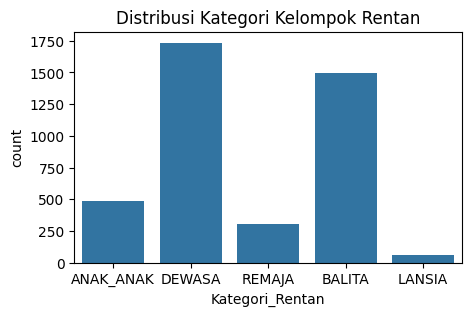

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='Kategori_Rentan')
plt.title(f"Distribusi Kategori Kelompok Rentan")
plt.show()

#ANALISIS BIVARIAT

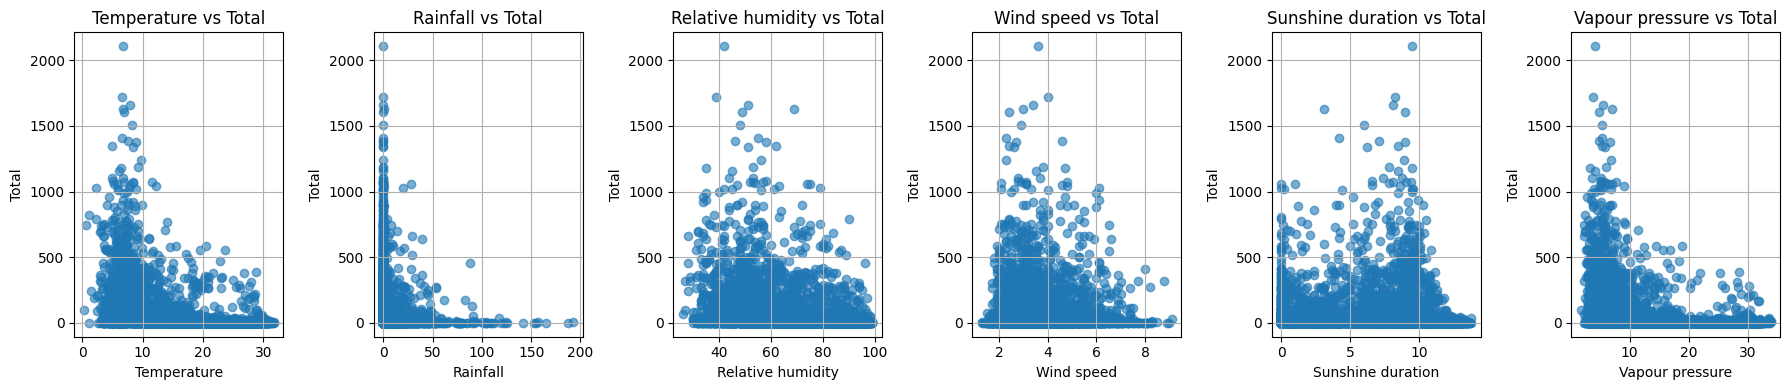

In [ ]:
pairs = [('Temperature', 'Total'), ('Rainfall', 'Total'), ('Relative humidity', 'Total'), ('Wind speed', 'Total'),
         ('Sunshine duration', 'Total'), ('Vapour pressure', 'Total')]

fig, axes = plt.subplots(1, len(pairs), figsize=(18, 4))
for i, (x_col, y_col) in enumerate(pairs):
    axes[i].scatter(df[x_col], df[y_col], alpha=0.6)
    axes[i].set_title(f'{x_col} vs {y_col}')
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)
    axes[i].grid(True)
plt.tight_layout()
plt.show()

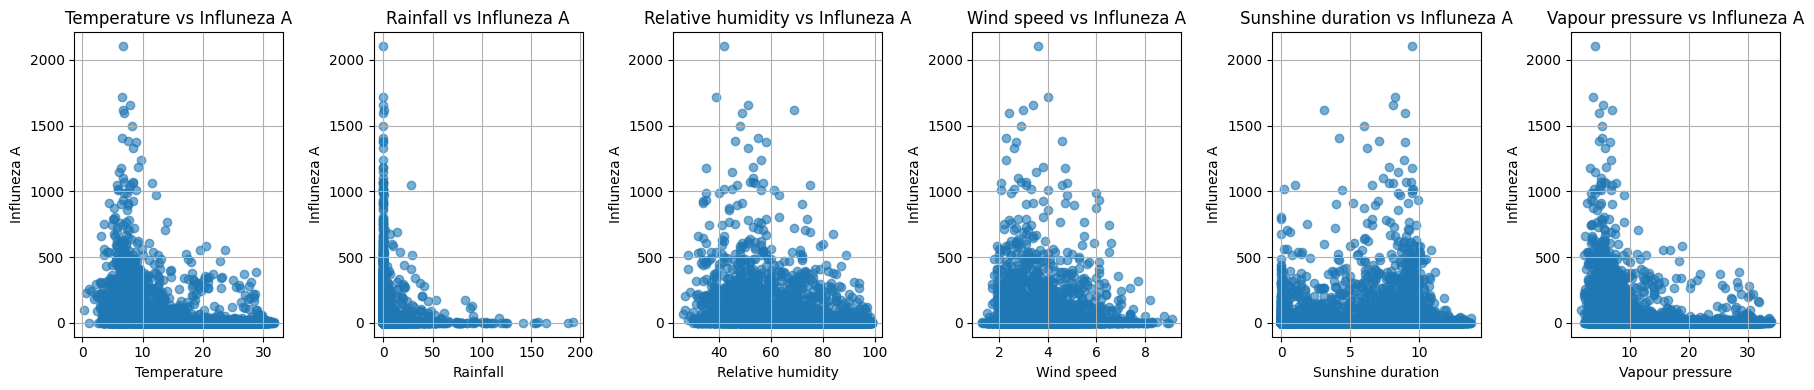

In [ ]:
pairs = [('Temperature', 'Influneza A'), ('Rainfall', 'Influneza A'), ('Relative humidity', 'Influneza A'), ('Wind speed', 'Influneza A'),
         ('Sunshine duration', 'Influneza A'), ('Vapour pressure', 'Influneza A')]

fig, axes = plt.subplots(1, len(pairs), figsize=(18, 4))
for i, (x_col, y_col) in enumerate(pairs):
    axes[i].scatter(df[x_col], df[y_col], alpha=0.6)
    axes[i].set_title(f'{x_col} vs {y_col}')
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)
    axes[i].grid(True)
plt.tight_layout()
plt.show()

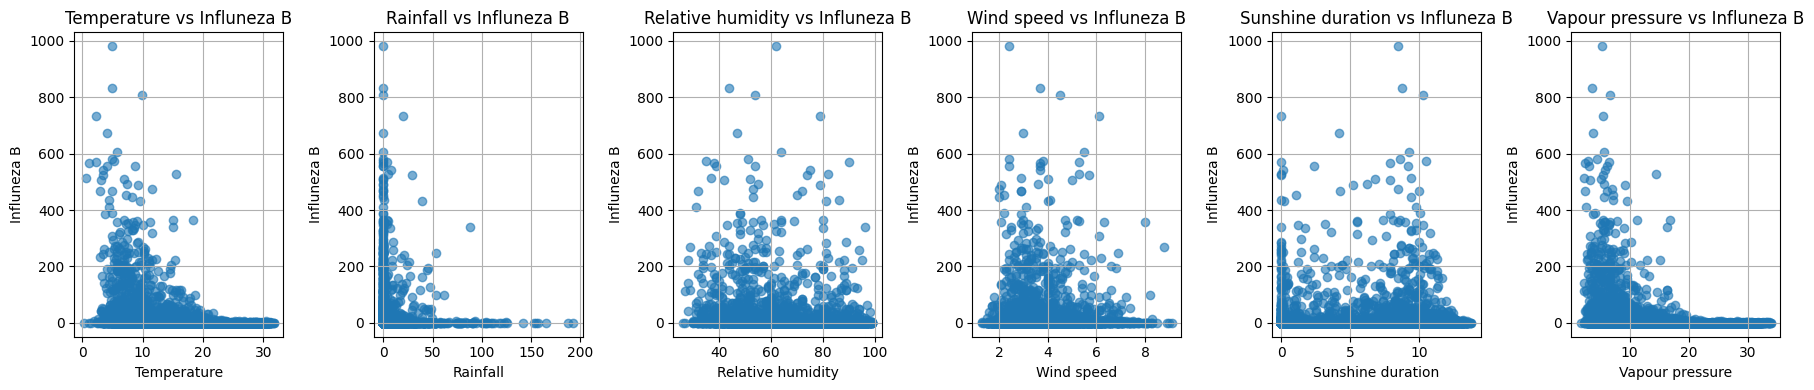

In [ ]:
pairs = [('Temperature', 'Influneza B'), ('Rainfall', 'Influneza B'), ('Relative humidity', 'Influneza B'), ('Wind speed', 'Influneza B'),
         ('Sunshine duration', 'Influneza B'), ('Vapour pressure', 'Influneza B')]

fig, axes = plt.subplots(1, len(pairs), figsize=(18, 4))
for i, (x_col, y_col) in enumerate(pairs):
    axes[i].scatter(df[x_col], df[y_col], alpha=0.6)
    axes[i].set_title(f'{x_col} vs {y_col}')
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)
    axes[i].grid(True)
plt.tight_layout()
plt.show()

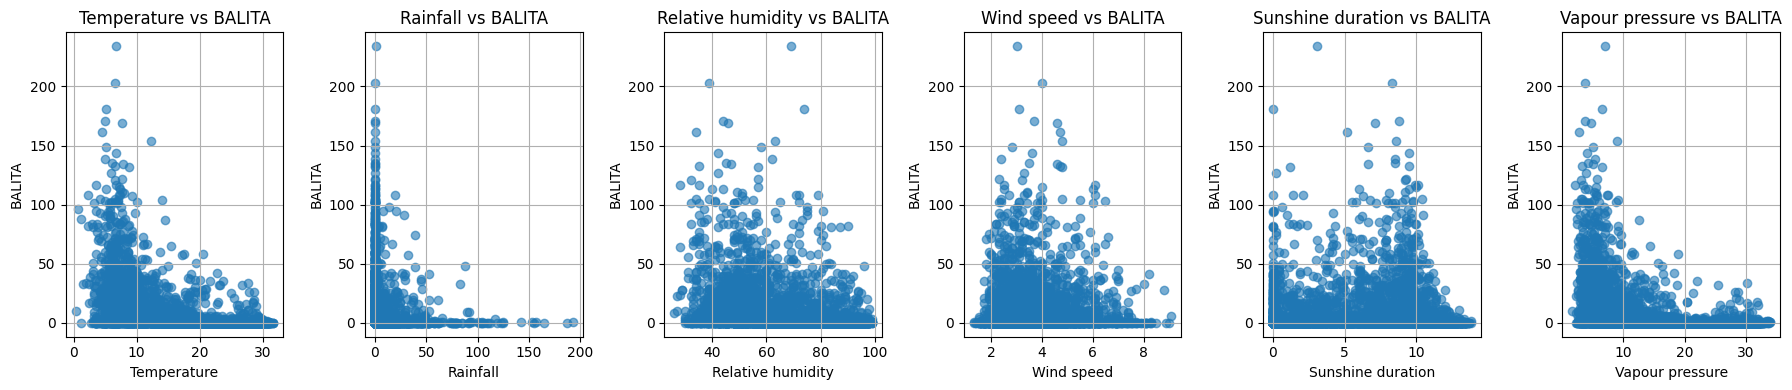

In [ ]:
pairs = [('Temperature', 'BALITA'), ('Rainfall', 'BALITA'), ('Relative humidity', 'BALITA'), ('Wind speed', 'BALITA'),
         ('Sunshine duration', 'BALITA'), ('Vapour pressure', 'BALITA')]


fig, axes = plt.subplots(1, len(pairs), figsize=(18, 4))
for i, (x_col, y_col) in enumerate(pairs):
    axes[i].scatter(df[x_col], df[y_col], alpha=0.6)
    axes[i].set_title(f'{x_col} vs {y_col}')
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)
    axes[i].grid(True)
plt.tight_layout()

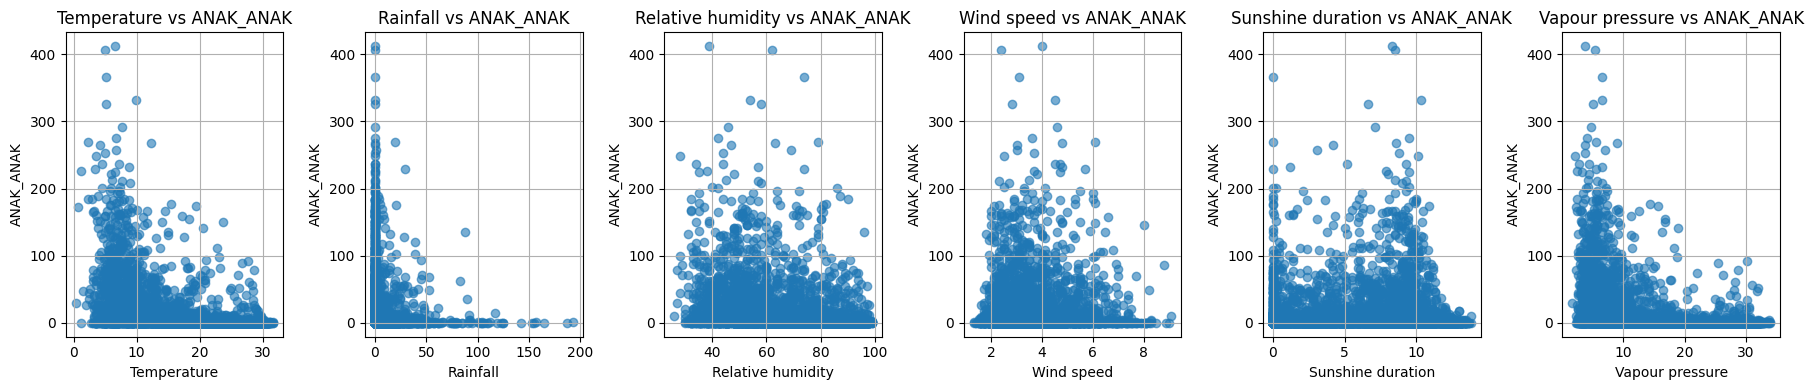

In [ ]:
pairs = [('Temperature', 'ANAK_ANAK'), ('Rainfall', 'ANAK_ANAK'), ('Relative humidity', 'ANAK_ANAK'), ('Wind speed', 'ANAK_ANAK'),
         ('Sunshine duration', 'ANAK_ANAK'), ('Vapour pressure', 'ANAK_ANAK')]

fig, axes = plt.subplots(1, len(pairs), figsize=(18, 4))
for i, (x_col, y_col) in enumerate(pairs):
    axes[i].scatter(df[x_col], df[y_col], alpha=0.6)
    axes[i].set_title(f'{x_col} vs {y_col}')
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)
    axes[i].grid(True)
plt.tight_layout()
plt.show()

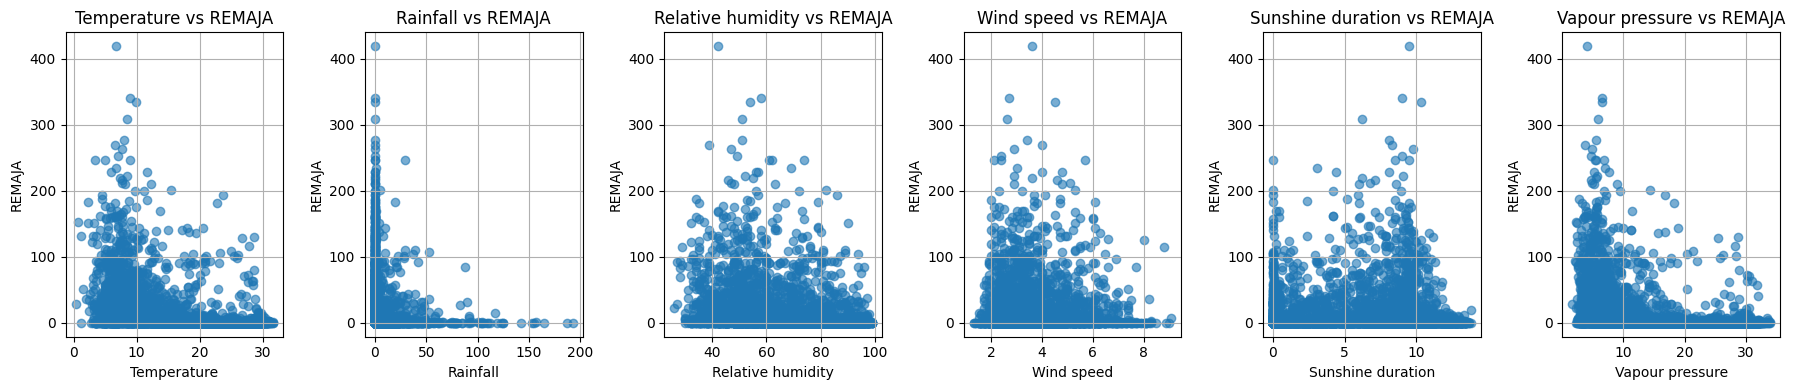

In [ ]:
pairs = [('Temperature', 'REMAJA'), ('Rainfall', 'REMAJA'), ('Relative humidity', 'REMAJA'), ('Wind speed', 'REMAJA'),
         ('Sunshine duration', 'REMAJA'), ('Vapour pressure', 'REMAJA')]

fig, axes = plt.subplots(1, len(pairs), figsize=(18, 4))
for i, (x_col, y_col) in enumerate(pairs):
    axes[i].scatter(df[x_col], df[y_col], alpha=0.6)
    axes[i].set_title(f'{x_col} vs {y_col}')
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)
    axes[i].grid(True)
plt.tight_layout()
plt.show()

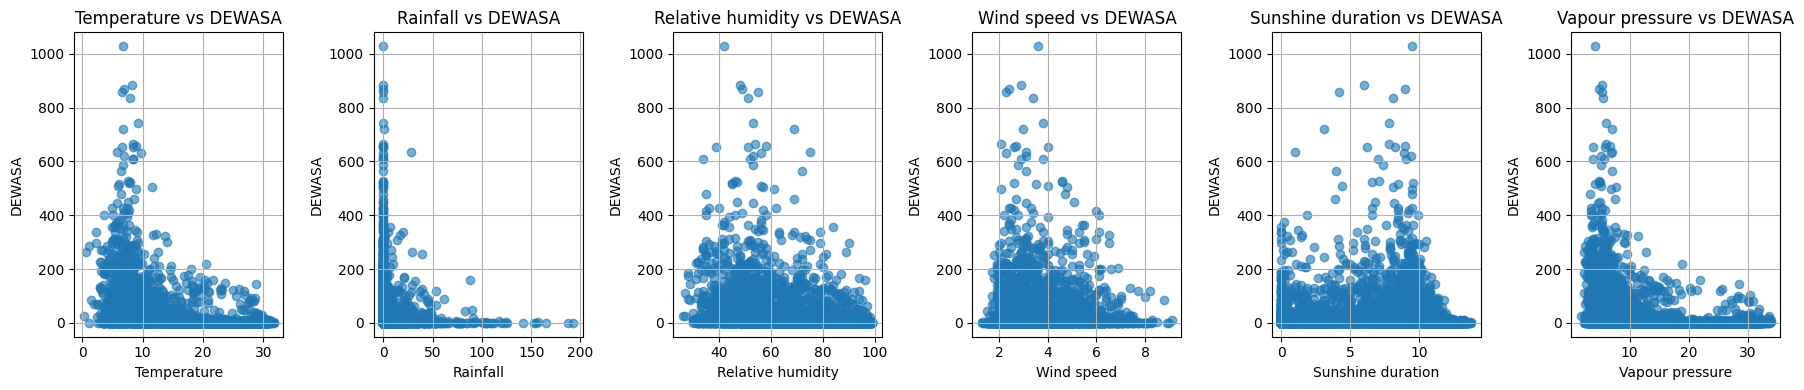

In [ ]:
pairs = [('Temperature', 'DEWASA'), ('Rainfall', 'DEWASA'), ('Relative humidity', 'DEWASA'), ('Wind speed', 'DEWASA'),
         ('Sunshine duration', 'DEWASA'), ('Vapour pressure', 'DEWASA')]

fig, axes = plt.subplots(1, len(pairs), figsize=(18, 4))
for i, (x_col, y_col) in enumerate(pairs):
    axes[i].scatter(df[x_col], df[y_col], alpha=0.6)
    axes[i].set_title(f'{x_col} vs {y_col}')
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)
    axes[i].grid(True)
plt.tight_layout()
plt.show()

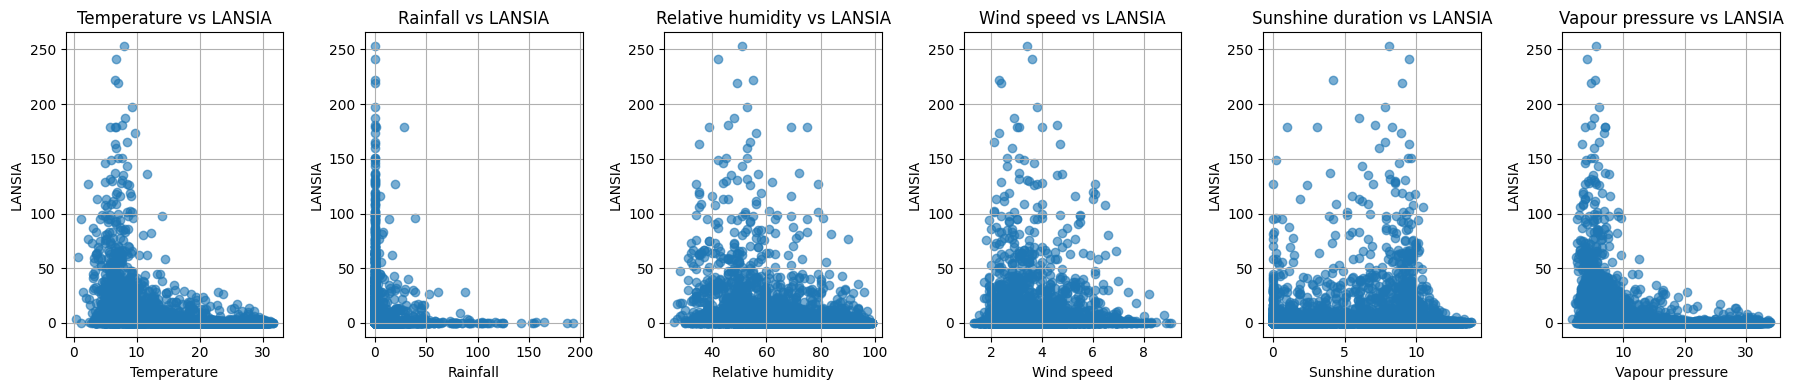

In [ ]:
pairs = [('Temperature', 'LANSIA'), ('Rainfall', 'LANSIA'), ('Relative humidity', 'LANSIA'), ('Wind speed', 'LANSIA'),
         ('Sunshine duration', 'LANSIA'), ('Vapour pressure', 'LANSIA')]

fig, axes = plt.subplots(1, len(pairs), figsize=(18, 4))
for i, (x_col, y_col) in enumerate(pairs):
    axes[i].scatter(df[x_col], df[y_col], alpha=0.6)
    axes[i].set_title(f'{x_col} vs {y_col}')
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)
    axes[i].grid(True)
plt.tight_layout()
plt.show()

#ANALISIS MULTIVARIAT


=== Matriks Korelasi Spearman ===
                        Total  Influneza A  Influneza B      Male    Female  \
Total                1.000000     0.965778     0.743462  0.982866  0.980534   
Influneza A          0.965778     1.000000     0.609414  0.950579  0.949347   
Influneza B          0.743462     0.609414     1.000000  0.736658  0.734149   
Male                 0.982866     0.950579     0.736658  1.000000  0.945965   
Female               0.980534     0.949347     0.734149  0.945965  1.000000   
BALITA               0.906758     0.877971     0.699911  0.903461  0.908039   
ANAK_ANAK            0.929598     0.894296     0.711532  0.929081  0.929313   
REMAJA               0.933362     0.903493     0.702516  0.932066  0.930934   
DEWASA               0.973276     0.945523     0.729986  0.963670  0.959519   
LANSIA               0.858383     0.840692     0.664066  0.855069  0.857632   
Temperature         -0.535099    -0.505308    -0.508903 -0.537205 -0.546420   
Minimum Temperatu

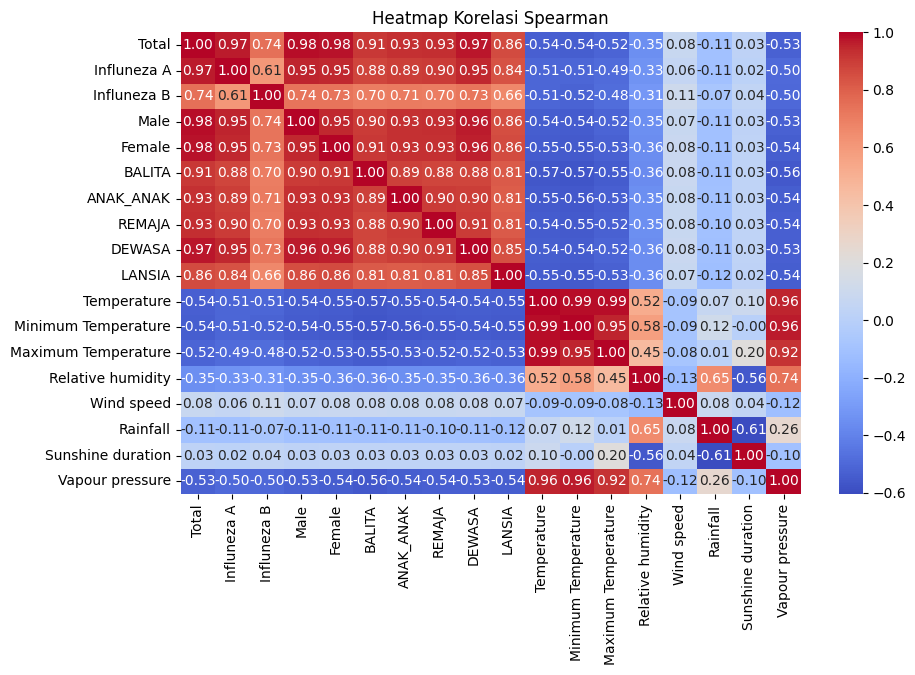

In [ ]:
spearman_corr = df[num_cols].corr(method="spearman")

print("\n=== Matriks Korelasi Spearman ===")
print(spearman_corr)

plt.figure(figsize=(10,6))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Spearman")
plt.show()